# Importing Libraries 

In [1]:
#Supress Warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# imnporting all required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import sqrt

# Understanding the Data Set

In [3]:
# Importing data
bikeshare= pd.read_csv("day.csv")
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikeshare.shape

(730, 16)

In [5]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikeshare.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Visualizing Data

  .Visualizing Numeric varible using plot

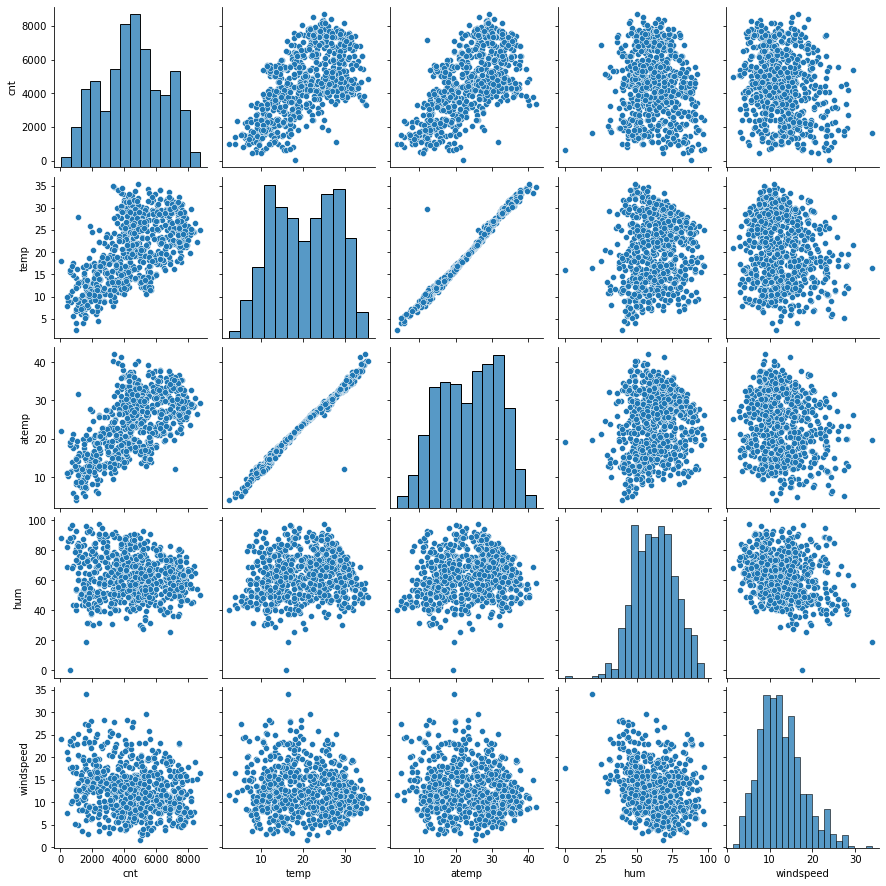

In [9]:
# pairplot for numerical variable
sns.pairplot(data=bikeshare,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Visualizing Categorical variable using boxplot 

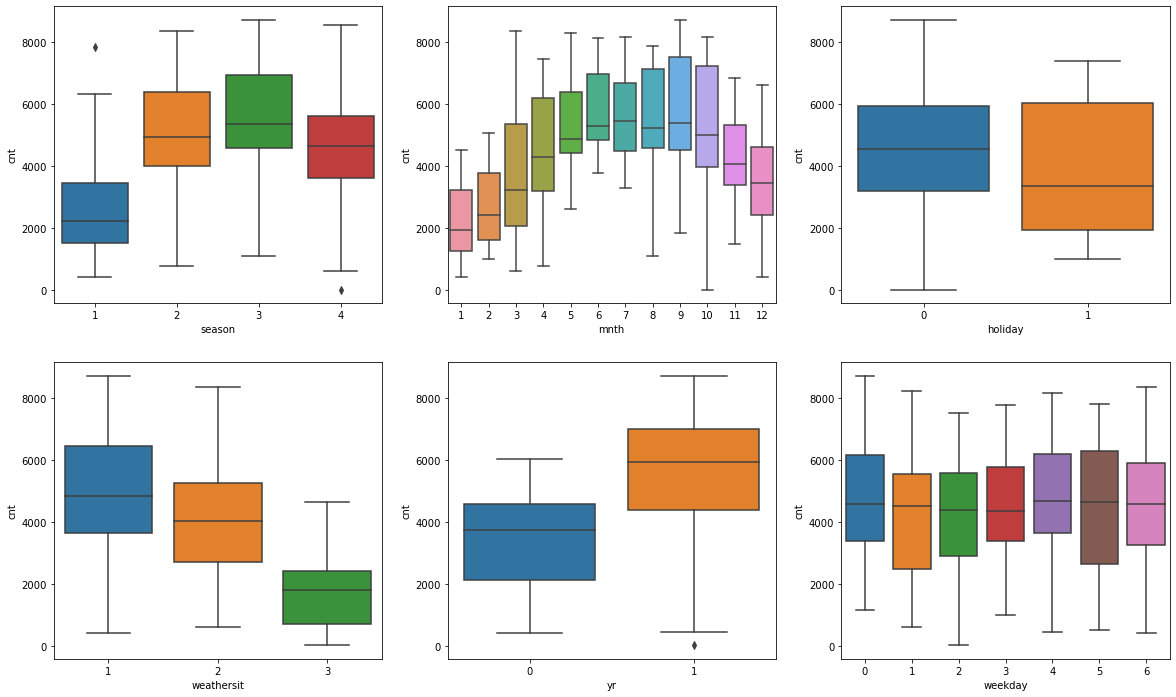

In [10]:
# plotting of categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.show()

<Figure size 576x576 with 0 Axes>

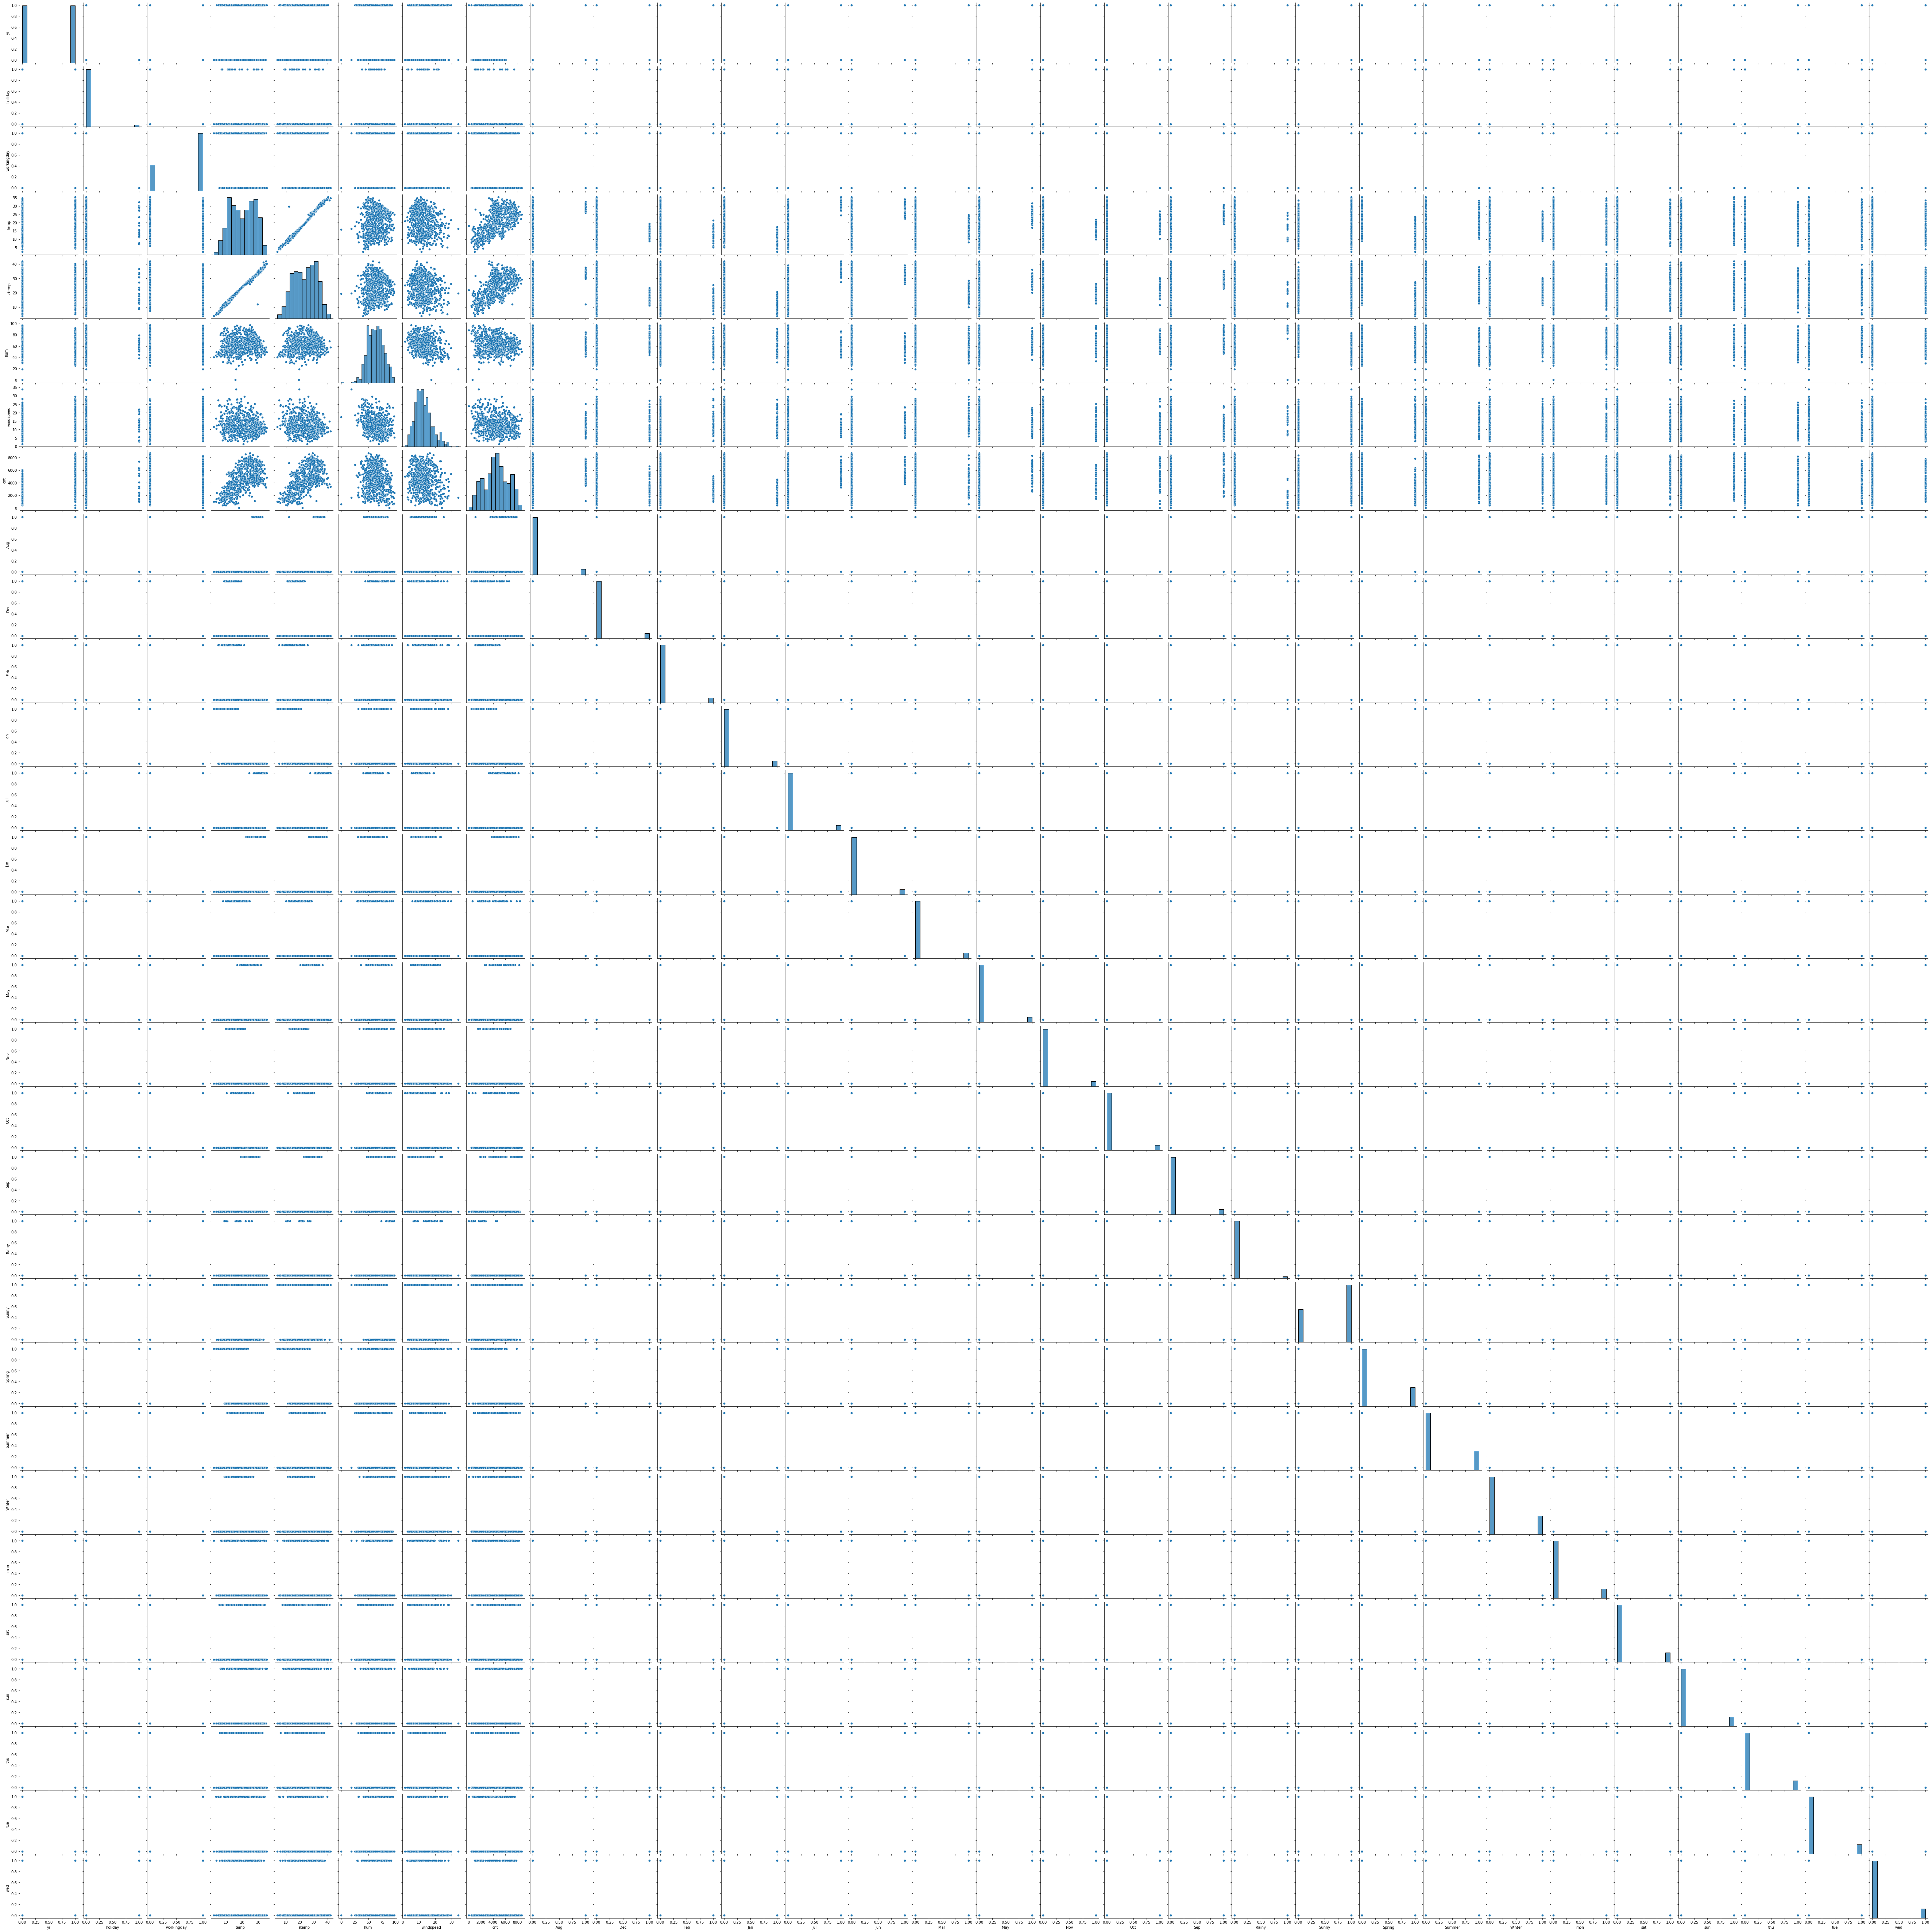

In [60]:
plt.figure(figsize=[8,8])
sns.pairplot(bikeshare)
plt.show()

# Data Preparation
   - Here we remove column which is not relevent to the data set.
   - we Change some column data ffrom numeric to categorical data.

In [12]:
bikeshare.drop(['instant', 'dteday','casual','registered'],axis = 1,inplace=True)
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikeshare.shape

(730, 12)

In [14]:
bikeshare.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [15]:
### Converting some numeric values to categorical data
import calendar
bikeshare['mnth'] = bikeshare['mnth'].apply(lambda x: calendar.month_abbr[x])

bikeshare.season = bikeshare.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

bikeshare.weathersit = bikeshare.weathersit.replace({1:'Sunny',2:'Misty',3:'Rainy',4:'Cold'})

bikeshare.weekday = bikeshare.weekday.replace({0:'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6:'sat'})
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,wed,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,thu,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,fri,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600


# Dummy Variable Creation


In [16]:
## Creating dummies 
Month=pd.get_dummies(bikeshare['mnth'],drop_first=True)
Weather=pd.get_dummies(bikeshare['weathersit'],drop_first=True)
Season=pd.get_dummies(bikeshare['season'],drop_first=True)
Days=pd.get_dummies(bikeshare['weekday'],drop_first=True)


In [17]:
bikeshare=pd.concat([bikeshare,Month,Weather,Season,Days],axis=1)
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sunny,Spring,Summer,Winter,mon,sat,sun,thu,tue,wed
0,Spring,0,Jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,1,0,0,1,0,0,0,0,0
1,Spring,0,Jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,0,0,1,0
2,Spring,0,Jan,0,wed,1,Sunny,8.050924,9.47025,43.7273,...,1,1,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,thu,1,Sunny,8.200000,10.60610,59.0435,...,1,1,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,fri,1,Sunny,9.305237,11.46350,43.6957,...,1,1,0,0,0,0,0,0,0,0


In [18]:
# droping variable for which dummy variable is created
bikeshare.drop(['season','mnth','weekday','weathersit'],axis = 1,inplace=True)
bikeshare.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sunny,Spring,Summer,Winter,mon,sat,sun,thu,tue,wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,1,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,1,1,0,0,0,0,0,0,0,0


# Splitting the Data into Training and Testing Sets
- As you know, the first basic step for regression is performing a train-test split.

In [19]:
train, test = train_test_split(bikeshare, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
# checking the  test data  
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sunny,Spring,Summer,Winter,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735,0.059361,0.086758,...,0.652968,0.255708,0.264840,0.232877,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630,0.236840,0.282125,...,0.477117,0.437258,0.442259,0.423633,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Rescaling 
- Here we use Min Max scaling

In [21]:
scaler=MinMaxScaler()

In [22]:
num_var=['cnt','hum','windspeed','temp','atemp']
train[num_var] = scaler.fit_transform(train[num_var])

In [23]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sunny,Spring,Summer,Winter,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,1,1,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,1,0,0,0,1,0,0,0


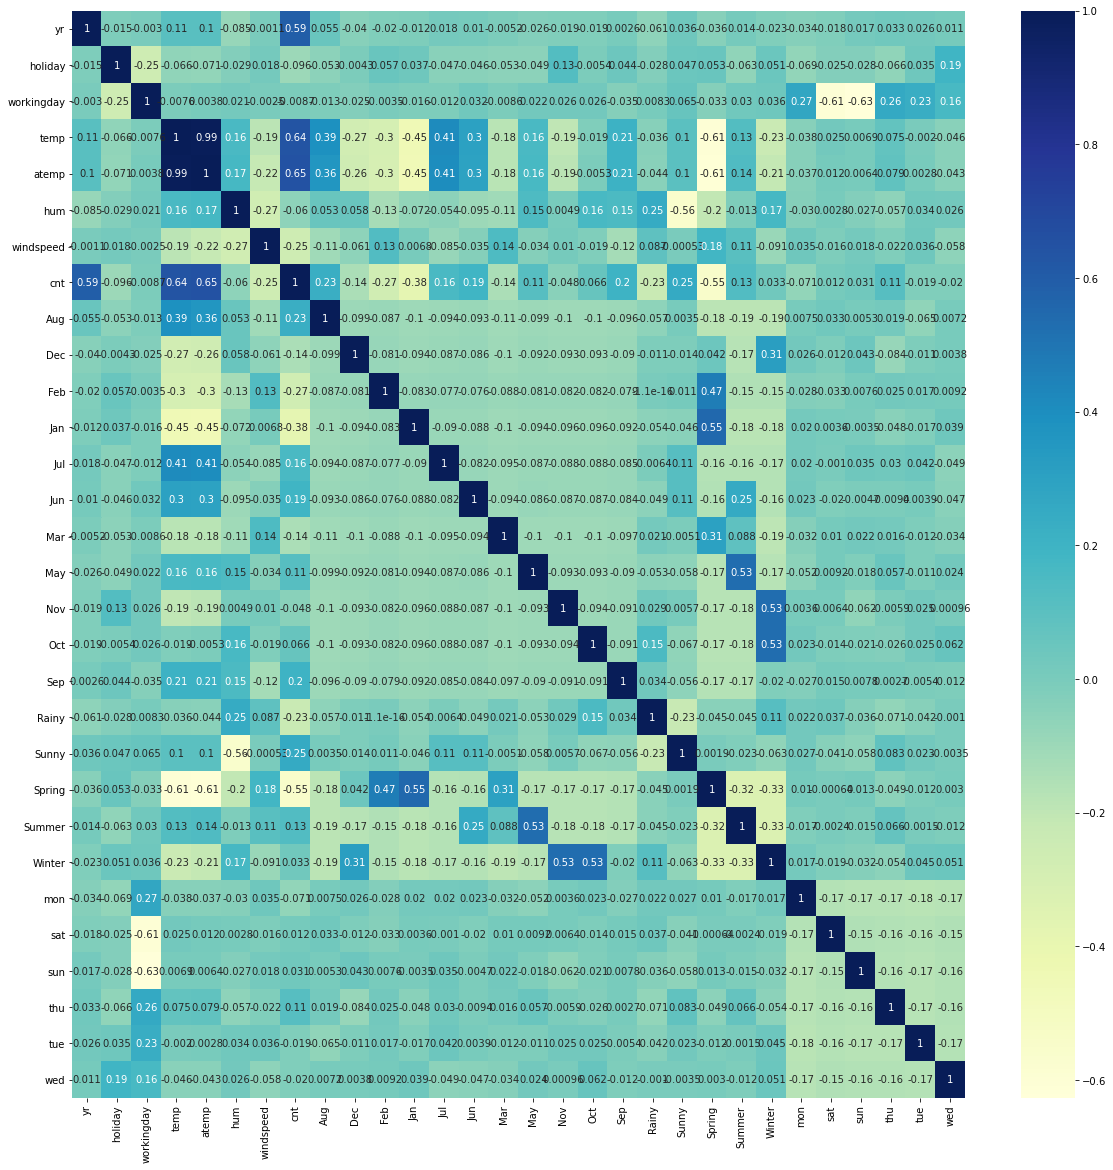

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(train.corr(), annot = True,cmap="YlGnBu")
plt.show()

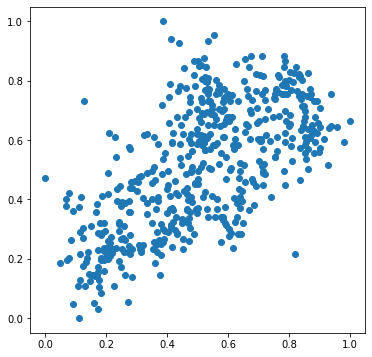

In [25]:
# here cnt,atemp,temp are highly correlated so we draw a scatterplot 
plt.figure(figsize=[6,6])
plt.scatter(train.cnt, train.atemp)
plt.show()

# Dividing into X and Y sets for the model building

In [26]:
y_train = train.pop('cnt')
X_train = train

# Building a linear model

In [27]:
# running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [28]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Rainy', True, 1),
 ('Sunny', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11)]

# Model 1

In [29]:
rfecol=X_train.columns[rfe.support_]
rfecol

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep', 'Rainy', 'Sunny', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [31]:
X_train_rfe=X_train[rfecol]

In [32]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [33]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.params

const        0.264367
yr           0.230328
holiday     -0.091228
temp         0.479977
hum         -0.160227
windspeed   -0.188457
Dec         -0.037199
Jan         -0.043748
Jul         -0.055495
Nov         -0.040949
Sep          0.074891
Rainy       -0.192240
Sunny        0.055876
Spring      -0.061737
Summer       0.040767
Winter       0.103435
dtype: float64

In [34]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.34e-189
Time:                        19:06:29   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2644      0.039      6.743      0.0

# Checking VIF for multicollinearity

In [35]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,97.62
13,Spring,5.27
3,temp,4.42
15,Winter,3.83
14,Summer,2.76
4,hum,1.93
9,Nov,1.76
7,Jan,1.68
12,Sunny,1.63
6,Dec,1.49


In [36]:
# removing column with VIF > 5
X_train_rfe=X_train_rfe.drop(['const'],axis = 1)

In [37]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.95
2,temp,21.40
12,Spring,4.97
4,windspeed,4.70
14,Winter,4.33
11,Sunny,3.58
13,Summer,2.99
0,yr,2.09
8,Nov,1.85
6,Jan,1.76


In [38]:
X_train_rfe=X_train_rfe.drop(['hum'],axis = 1)

# Model 2

In [39]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.57e-186
Time:                        19:06:30   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.032      5.162      0.0

In [41]:
# removing column with p-value >0.05
X_train_rfe = X_train_rfe.drop(["Nov"], axis = 1)

# Model 3

In [42]:
X_train_lm = sm.add_constant(X_train_rfe)

In [43]:
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.20e-186
Time:                        19:06:31   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1482      0.031      4.754      0.0

In [44]:
# removing p-value 
X_train_rfe = X_train_rfe.drop(["Dec"], axis = 1)

# Model 4 (Final)

In [45]:
X_train_lm = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.97e-187
Time:                        19:06:32   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1348      0.030      4.444      0.0

In [47]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.80
3,windspeed,4.64
8,Sunny,2.86
9,Spring,2.84
10,Summer,2.20
0,yr,2.07
11,Winter,1.79
4,Jan,1.60
5,Jul,1.60
6,Sep,1.33


# Residual Analysis of the train data

In [48]:
y_train_lm = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

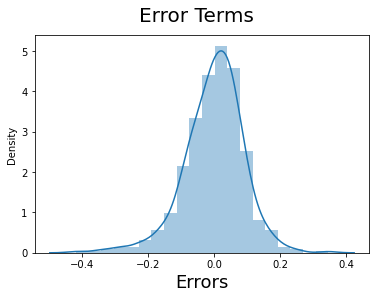

In [49]:
fig = plt.figure()
sns.distplot((y_train - y_train_lm), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

# Making Predictions Using the Final Model

### Applying the scaling on the test set

In [50]:
num_variable = ['cnt','hum','windspeed','temp','atemp']


test[num_variable] = scaler.transform(test[num_variable])

In [51]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sunny,Spring,Summer,Winter,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.652968,0.255708,0.264840,0.232877,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.477117,0.437258,0.442259,0.423633,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [52]:
y_test = test.pop('cnt')
X_test = test

In [53]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [54]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   holiday    219 non-null    int64  
 3   temp       219 non-null    float64
 4   windspeed  219 non-null    float64
 5   Jan        219 non-null    uint8  
 6   Jul        219 non-null    uint8  
 7   Sep        219 non-null    uint8  
 8   Rainy      219 non-null    uint8  
 9   Sunny      219 non-null    uint8  
 10  Spring     219 non-null    uint8  
 11  Summer     219 non-null    uint8  
 12  Winter     219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 12.0 KB


In [55]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test)

In [56]:
r2_score(y_test, y_pred)

0.8022983156745501

In [57]:
m_square_error = mean_squared_error(y_test, y_pred)
m_square_error

0.00939000126970945

# Model Evaluation
-Let plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

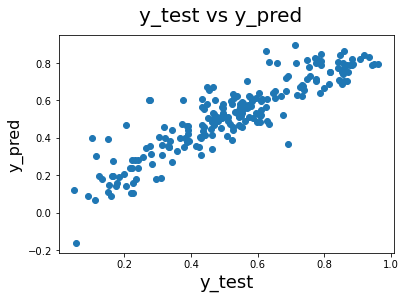

In [58]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [59]:
par = pd.DataFrame(lm.params)
par.insert(0,'Variables',par.index)
par.rename(columns = {0:'Coefficient value'},inplace = True)
par['index'] = list(range(0,13))
par.set_index('index',inplace = True)
par.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
par

,Variables,Coefficient value
index,,
3,temp,0.472772
1,yr,0.234197
0,const,0.134813
9,Sunny,0.080675
12,Winter,0.077050
7,Sep,0.076239
11,Summer,0.042205
5,Jan,-0.037996
6,Jul,-0.050722


##### we can see that the equation of our best fitted line is:

cnt = 0.199648 + 0.491508 X temp + 0.233482 X yr + 0.083084 X Winter - 0.066942 X  Spring + 0.083084 X Winter -0.052418 X Jul + 0.076686 X Sep -0.285155 X  Rainy -0.081558 X Mist  -0.098013 X holiday -0.147977X windspeed

- All the positive coefficients like temp,Summer indicate that an increase in these values will lead to an increase in the value of cnt.
- It is recommended to give most importance to tempratur,weather & season variables while planning to achieve maximum bike         rental booking.
- Rental reduce in Holidays.
- During summer we get more rental so availability of bikes  should be taken care off as it may affect the services.  